In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("SimpleLR.csv")

In [3]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
x=df['SAT']
y=df['GPA']

In [9]:
reg=LinearRegression()
x=x.values.reshape(-1,1)

In [10]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
a=reg.score(x,y)

In [17]:
new_data=pd.DataFrame(data=[1740,1760],columns=['SAT'])
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [15]:
reg.coef_

array([0.00165569])

In [16]:
reg.intercept_

0.27504029966028076

Text(0, 0.5, 'GPA')

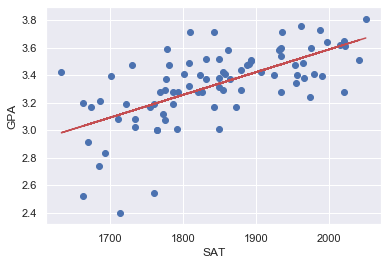

In [21]:
plt.scatter(x,y)
yhat=x*reg.coef_+reg.intercept_
plt.plot(x,yhat,color='r')
plt.xlabel("SAT")
plt.ylabel("GPA")

In [23]:
# Adjusted R square
x.shape

(84, 1)

In [26]:
adjr2=1-(1-a)*(84-1)/(84-1-1)
print(adjr2)

0.3987600600991976


In [30]:
# F regression 
from sklearn.feature_selection import f_regression
f_regression(x,y)

(array([56.04804786]), array([7.19951844e-11]))

In [41]:
p=f_regression(x,y)[1]
p.round(8)

array([0.])

In [45]:
reg_summary=pd.DataFrame(data=df['SAT'],columns=['feature'])
reg_summary['coefficient']=reg.coef_
reg_summary['pvalues']=p.round(3)

In [46]:
reg_summary

,feature,coefficient,pvalues
0,NaN,0.001656,0.0


In [49]:
# STANDARDISING 

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x)
x_scaled=scalar.transform(x)

In [50]:
reg=LinearRegression()
reg.fit(x_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
reg_summary=pd.DataFrame([['Bias'],['SAT']],columns=['Features'])
reg_summary['Weights']=reg.intercept_,reg.coef_

In [53]:
reg_summary

,Features,Weights
0,Bias,3.33024
1,SAT,[0.17203690213615216]


In [54]:
#Prediction
new_data=pd.DataFrame(data=[1700,1800],columns=['SAT'])
reg.predict(new_data)

array([295.79297173, 312.99666194])

In [56]:
new_data=scalar.transform(new_data)
reg.predict(new_data)

array([3.08970998, 3.25527879])